# 1.Loading the Synthetic Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import xgboost as xgb

In [3]:

df=pd.read_csv('synthetic_maintenance_data.csv')

In [4]:
# Ensure correct data types
df['issue_reported_date'] = pd.to_datetime(df['issue_reported_date'])
df['issue_resolved_date'] = pd.to_datetime(df['issue_resolved_date'])
df['apartment_id'] = df['apartment_id'].astype('category')


# 2. Feature Engineering
Create additional features that might be useful for prediction.

### Create a feature for maintenance duration in days


In [9]:
df['maintenance_duration_days'] = (df['issue_resolved_date'] - df['issue_reported_date']).dt.days

# Encode categorical variables
df = pd.get_dummies(df, columns=['maintenance_type', 'resource_allocated', 'billing_cycle'])

# Drop columns that won't be used for prediction
df.drop(['apartment_id', 'issue_reported_date', 'issue_resolved_date'], axis=1, inplace=True)



# 3. Prepare Data for Modeling
Split the dataset into features (X) and target (y), then into training and testing sets.
### Define features and target variable


In [12]:
X = df.drop('maintenance_cost', axis=1)
y = df['maintenance_cost']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [14]:
# Initialize the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [15]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

RMSE: 15.11255740054602
R^2: 0.9875568963198302


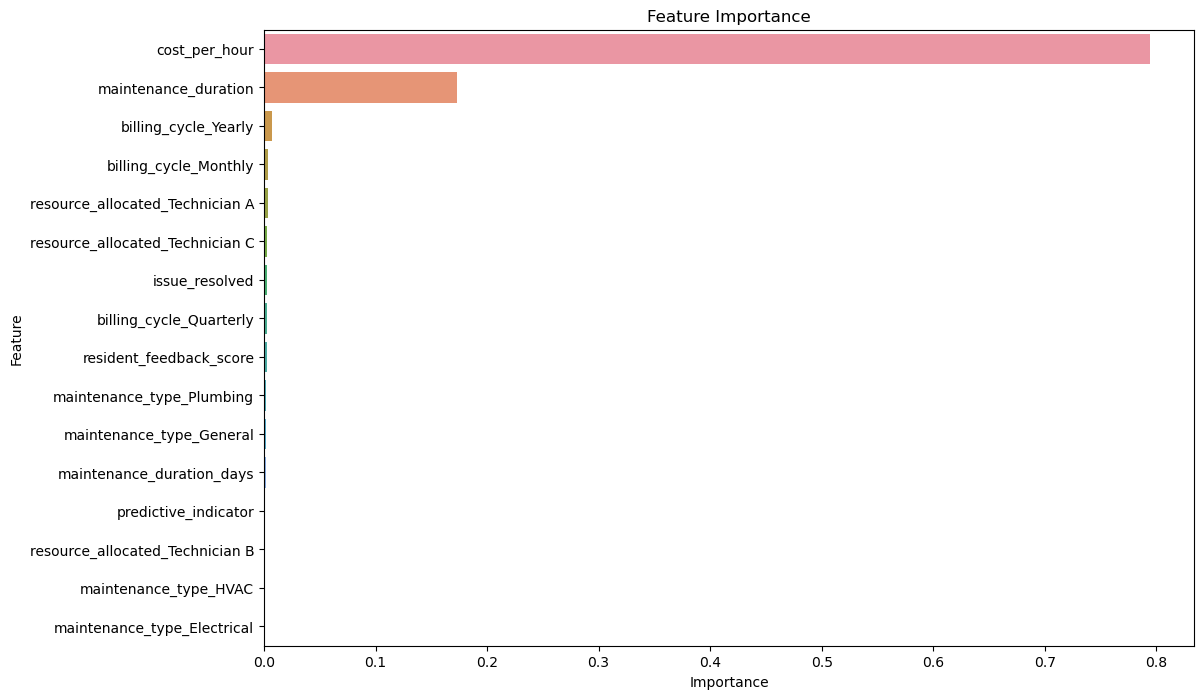

In [16]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('feature_importances.png')
plt.show()


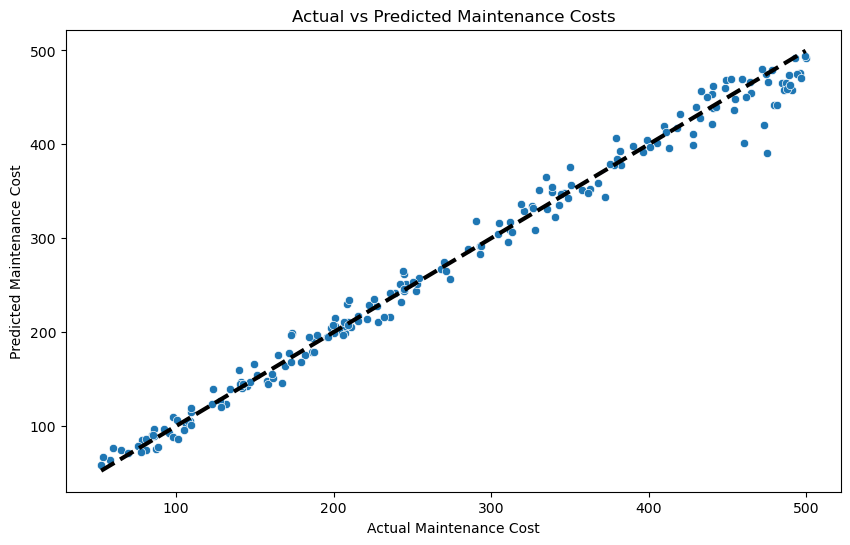

In [17]:
# Combine actual and predicted results
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.reset_index(drop=True, inplace=True)

# Plot actual vs predicted results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results)
plt.plot([results['Actual'].min(), results['Actual'].max()], [results['Actual'].min(), results['Actual'].max()], 'k--', lw=3)
plt.title('Actual vs Predicted Maintenance Costs')
plt.xlabel('Actual Maintenance Cost')
plt.ylabel('Predicted Maintenance Cost')
plt.savefig('XGboostRegression.png')
plt.show()

In [20]:
# Calculate accuracy rate
accuracy_rate = (1 - (rmse / y_test.mean())) * 100
print(f"Accuracy Rate: {accuracy_rate:.2f}%")

Accuracy Rate: 94.51%
